In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from matplotlib import pyplot as plt

***Loading XLSX into DataFrame***

In [2]:
clean_googleplaystore_df = pd.read_excel('GooglePlaystore.xlsx')

### ***Preprocessing***

***1. Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.***

In [3]:
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Reviews'] != "3.0M"]
clean_googleplaystore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


***2. Remove rows where any of the columns has the value "Varies with device".***

In [4]:
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['App'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Category'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Rating'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Reviews'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Size'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Installs'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Type'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Price'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Content Rating'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Genres'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Last Updated'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Current Ver'] != 'Varies with device']
clean_googleplaystore_df = clean_googleplaystore_df[clean_googleplaystore_df['Android Ver'] != 'Varies with device']

clean_googleplaystore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up


***3. The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".***

In [5]:
clean_googleplaystore_df['Android Ver'].fillna('0', inplace=True)
rows, cols = clean_googleplaystore_df.shape
clean_googleplaystore_df.index = [x for x in range(rows)] # changing the indexes
ser = clean_googleplaystore_df['Android Ver'].copy()
clean_googleplaystore_df
for i, item in enumerate(ser):
    item = item.strip(" and up")
    if item.count('.') > 1:
        num_dot = 0
        sec_dot_index = 0
        for index, char in enumerate(item):
            if char == '.':
                num_dot+=1
            if num_dot == 2:
                sec_dot_index = index
                break
        item = item[:sec_dot_index]
    if '-' in item:
        hyphen_index = 0
        for index, char in enumerate(item):
            if char == '-':
                hyphen_index = index
                break
        item = item[:hyphen_index - 1]
    for index, char in enumerate(item):
        if char.isalpha():
            item = item[:index]
            break
    ser[i] = item
    
clean_googleplaystore_df['Android Ver'] = ser
clean_googleplaystore_df['Android Ver'] = clean_googleplaystore_df['Android Ver'].astype(float)
clean_googleplaystore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9054,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
9055,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
9056,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
9057,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


***4. The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.***

In [6]:
ser = clean_googleplaystore_df['Installs'].copy()
for i, item in enumerate(ser):
    item = item.replace(',', '')
    item = item.strip('+')
    ser[i] = item

clean_googleplaystore_df['Installs'] = ser
clean_googleplaystore_df['Installs'] = clean_googleplaystore_df['Installs'].astype(int)

In [7]:
clean_googleplaystore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9059 entries, 0 to 9058
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9059 non-null   object 
 1   Category        9059 non-null   object 
 2   Rating          7643 non-null   float64
 3   Reviews         9059 non-null   object 
 4   Size            9059 non-null   object 
 5   Installs        9059 non-null   int64  
 6   Type            9059 non-null   object 
 7   Price           9059 non-null   object 
 8   Content Rating  9059 non-null   object 
 9   Genres          9059 non-null   object 
 10  Last Updated    9059 non-null   object 
 11  Current Ver     9051 non-null   object 
 12  Android Ver     9059 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


***5. For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.***

In [8]:
clean_googleplaystore_df.drop(index=clean_googleplaystore_df[clean_googleplaystore_df['Rating'].isnull() & 
                                                             (clean_googleplaystore_df['Reviews'] < 100) & 
                                                             (clean_googleplaystore_df['Installs'] < 50000)].index, 
                              inplace = True)
rows, cols = clean_googleplaystore_df.shape
clean_googleplaystore_df.index = [x for x in range(rows)]

In [9]:
clean_googleplaystore_df['Rating'] = clean_googleplaystore_df.groupby('Category')['Rating'].apply(
    lambda x:round(x.fillna(x.mean()), 2))
# clean_googleplaystore_df
clean_googleplaystore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
7681,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
7682,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
7683,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


***6. Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.***

In [10]:
ser = clean_googleplaystore_df['Size'].copy()
for index,item in enumerate(ser):
    item = item.replace('M', '00000')
    item = item.replace('K', '00')
    item = item.replace('k', '00')
    item = item.replace('m', '00000')
    item = item.replace('.', '')
    ser[index] = item
    # print(item)
clean_googleplaystore_df['Size'] = ser
clean_googleplaystore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1900000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1400000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680,FR Tides,WEATHER,3.8,1195,58200,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
7681,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,61900,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
7682,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
7683,Sya9a Maroc - FR,FAMILY,4.5,38,5300000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


### ***Analysis***

***1. Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category***

In [11]:
clean_googleplaystore_df.groupby('Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358644,0.365322,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320136,0.453084,2.7,4.100,4.40,4.600,5.0
BUSINESS,246.0,4.119187,0.662586,1.0,3.825,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,210.0,4.100952,0.502624,1.0,3.900,4.20,4.400,5.0
DATING,174.0,3.957816,0.664204,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


***2. Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:***
    <p>a. Rating (gives top 3 most highly rated applications in each category)</p>
    <p>b. Installs (gives top 3 most installed applications in each category)</p>
    <p>c. Reviews (gives top 3 most reviewed applications in each category)</p>
    You don't need to do anything explicit to break ties.

***Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column, as for instance:***

In [12]:
free_apps_df = clean_googleplaystore_df[clean_googleplaystore_df['Type'] == 'Free']
rows, cols = free_apps_df.shape
free_apps_df.index = [i for i in range(rows)]
free_apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1900000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1400000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,FR Tides,WEATHER,3.8,1195,58200,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
7107,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,61900,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
7108,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
7109,Sya9a Maroc - FR,FAMILY,4.5,38,5300000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


***3. Find the average, maximum and minimum price of the paid applications.***

In [13]:
paid_df = clean_googleplaystore_df[clean_googleplaystore_df['Type'] == 'Paid']
print('Average: ', paid_df['Price'].mean())
print('Max: ', paid_df['Price'].max())
print('Min: ', paid_df['Price'].min())

Average:  15.139163763066062
Max:  400
Min:  0.99


### ***Visualization***

***1. In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].***

**Count the number of applications per genre and display it using a pie chart.**

**Hint: Read about DataFrame.explode()**

In [14]:
genres_df = clean_googleplaystore_df.copy()

In [15]:
ser = genres_df['Genres'].copy()
for i, item in enumerate(ser):
    item = item.split(';')
    ser[i] = item
genres_df['Genres'] = ser

In [16]:
exploded_genres_df = genres_df.explode('Genres')

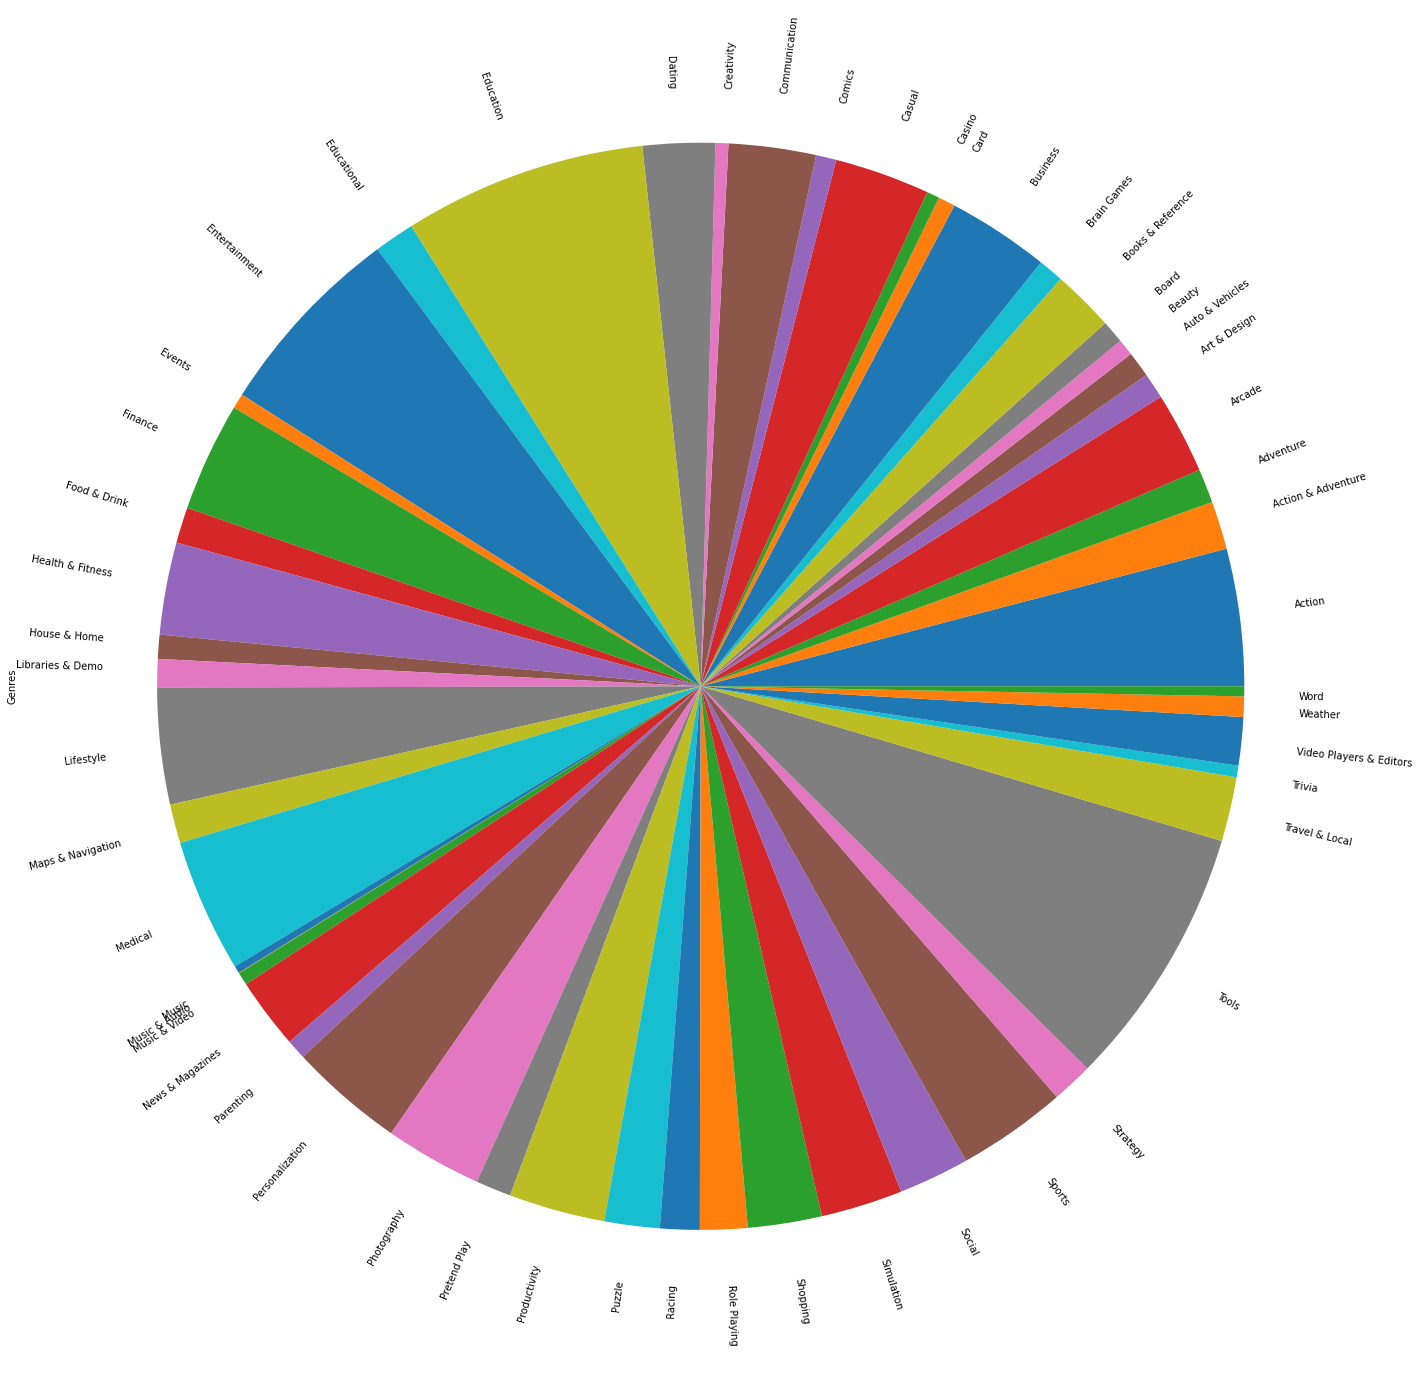

In [17]:
apps_per_genre = exploded_genres_df['Genres'].value_counts()
apps_per_genre = apps_per_genre.sort_index()
plot = apps_per_genre.plot.pie( figsize=(25,25), rotatelabels=90)

**2. Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.**


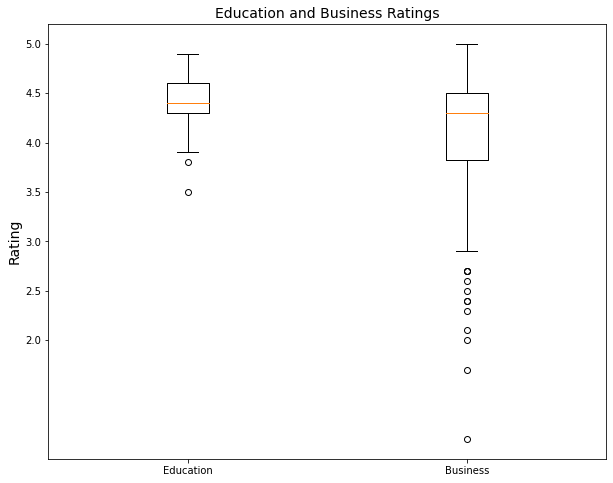

In [18]:
education_df = clean_googleplaystore_df[(clean_googleplaystore_df['Category'] == 'EDUCATION')]
business_df = clean_googleplaystore_df[(clean_googleplaystore_df['Category'] == 'BUSINESS')]

plt.figure(figsize=(10, 8))
plt.boxplot([education_df['Rating'], business_df['Rating']],labels=('Education','Business'))
plt.ylabel('Rating', fontsize=14)
plt.yticks([2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.title('Education and Business Ratings', fontsize=14)
plt.show()